In [1]:
import nltk
from konlpy.tag import Hannanum
import pandas as pd
from time import sleep
import datetime 

In [178]:
? rc

In [2]:
import platform

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set()

from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:
    print("It's unknown system. Hangul fonts are not supported!")
    
plt.rcParams["figure.figsize"] = [12,6]

%matplotlib notebook

In [3]:
df1 = pd.read_csv("./4th2.csv", encoding = "utf-8")
d2 = df1.groupby("날짜").size()

In [4]:
df2 = pd.read_csv("./new/final_it.csv", encoding = "utf-8")

In [5]:
df3 = pd.read_csv("./4thIndustry.csv", encoding = "utf-8")

In [6]:
l = df2["Date"]
l2 = []
for i in l:
    d = i[:-3].replace(" ", "")
    l2.append(d)
df2["날짜2"] = l2

In [7]:
df2['date1'] = df2["날짜2"].apply(lambda x: datetime.datetime.strptime(x, '%Y.%m.%d'))

In [8]:
df3['date1'] = df3["Date"].apply(lambda x: datetime.datetime.strptime(x, '%Y.%m.%d'))

In [9]:
df1['date1'] = df1["날짜"].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))

In [82]:
sumdf2 = df2.groupby("date1").size().sum()
sumdf3 = df3.groupby("date1").size().sum()
sumdf1 = df1.groupby("date1").size().sum()

In [111]:
df3.head()

,Unnamed: 0,Title,Date,date1
0,0,11월 1일 인사,2018.10.31,2018-10-31
1,1,"[MODU 요즘 뜨는 학과] 빛으로 미래를 열다, 한양대 나노광전자학과",2018.10.31,2018-10-31
2,2,"[MODU 대학소식통] 한림대, 글로벌융합대학 ‘도헌글로벌스쿨’ 개관",2018.10.31,2018-10-31
3,3,"[MODU 주목! 생생 인터뷰] 과학으로 밝히는 정의, 법과학자",2018.10.31,2018-10-31
4,4,대한상의·중견기업연합회·중소기업중앙회 ‘동반성장 공동선언문’ 채택,2018.10.31,2018-10-31


In [89]:
l2 = []
l2 =df2.groupby("date1").size().apply(lambda x: int(x)/sumdf2 *100)

In [90]:
l2

date1
2018-01-01    0.162866
2018-01-02    0.488599
2018-01-03    0.325733
2018-01-04    0.488599
2018-01-05    0.325733
2018-01-08    0.977199
2018-01-09    0.325733
2018-01-10    0.162866
2018-01-11    0.325733
2018-01-12    0.488599
2018-01-16    0.325733
2018-01-17    0.162866
2018-01-18    0.325733
2018-01-19    0.162866
2018-01-22    1.302932
2018-01-23    0.325733
2018-01-24    0.325733
2018-01-25    0.325733
2018-01-26    0.488599
2018-01-29    1.302932
2018-01-30    0.325733
2018-01-31    1.465798
2018-02-05    1.302932
2018-02-06    0.488599
2018-02-07    0.325733
2018-02-08    0.162866
2018-02-09    0.162866
2018-02-12    0.162866
2018-02-13    0.325733
2018-02-14    0.162866
                ...   
2018-09-10    0.977199
2018-09-11    0.977199
2018-09-13    0.162866
2018-09-14    0.488599
2018-09-17    0.488599
2018-09-18    0.325733
2018-09-19    0.488599
2018-09-20    0.651466
2018-09-21    0.814332
2018-09-27    0.325733
2018-09-28    1.302932
2018-10-01    0.488599
2018-

In [83]:
l1 = []
l1 =df1.groupby("date1").size().apply(lambda x: int(x)/sumdf1 *100)

In [84]:
l3 = []
l3 =df3.groupby("date1").size().apply(lambda x: int(x)/sumdf3 *100)

In [75]:
df2.head()

,Unnamed: 0,Title,Date,날짜2,date1,rate
0,0,[기자의 視角] 외면당하는 택시 업계 '투쟁',2018. 10. 16 (화),2018.10.16,2018-10-16,NaN
1,1,"[社說] ""진보진영은 어째서 한 글자도 못 고치게 하는지 모르겠다""",2018. 10. 8 (월),2018.10.8,2018-10-08,NaN
2,2,바이오·화장품뷰티·태양광 등 6대 신성장산업 적극 육성… 4차산업혁명 선도한다,2018. 9. 28 (금),2018.9.28,2018-09-28,NaN
3,3,[뉴스 TALK] 출범 1년 4차산업혁명위 초라한 성적표,2018. 9. 28 (금),2018.9.28,2018-09-28,NaN
4,4,"[기고] ""국가는 이제라도 강호축에 관심갖고 대책 마련해야""",2018. 9. 28 (금),2018.9.28,2018-09-28,NaN


# 글 작성수시계열 그래프 작성

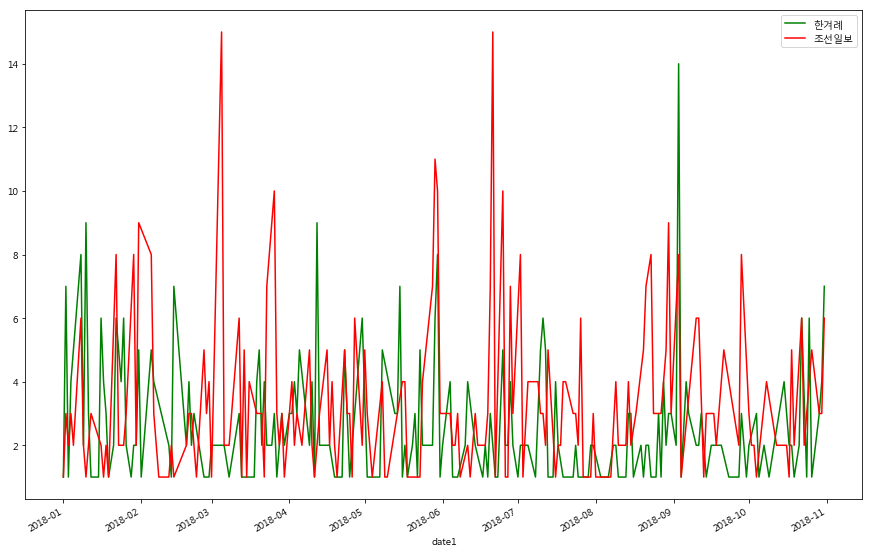

In [11]:
plt.figure(figsize =(15, 10))
df3.groupby("date1").size().plot(color = "g")
df2.groupby("date1").size().plot(color = "r")
plt.legend(("한겨례", "조선일보"))

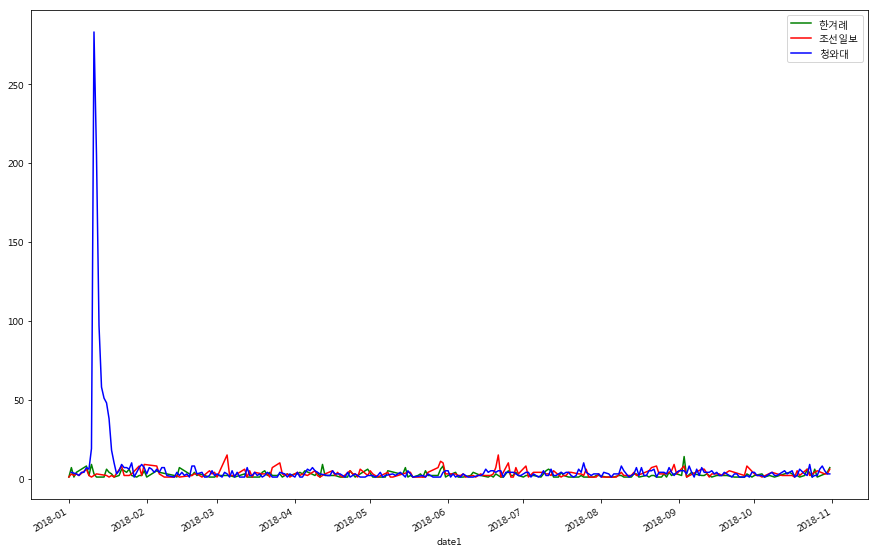

In [12]:
plt.figure(figsize =(15, 10))
df3.groupby("date1").size().plot(color = "g")
df2.groupby("date1").size().plot(color = "r")
df1.groupby("date1").size().plot(color = "b")
plt.legend(("한겨례", "조선일보", "청와대"))

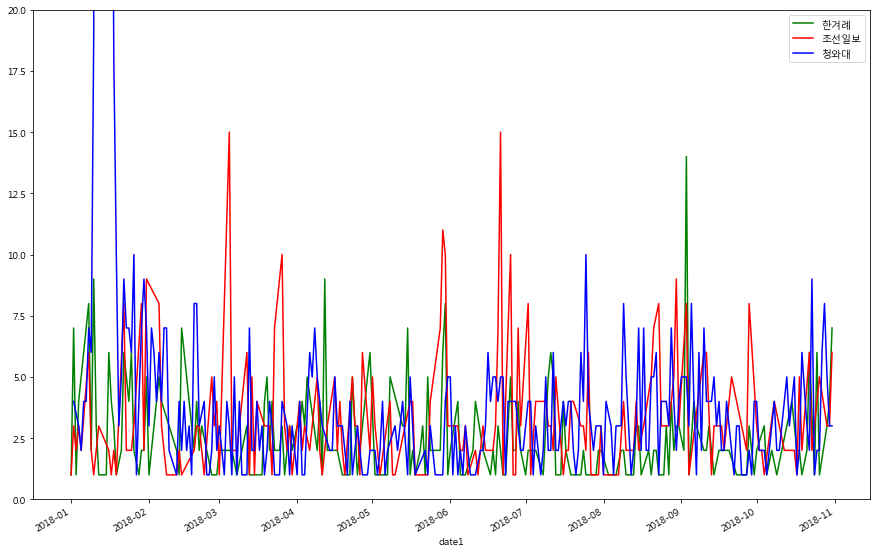

In [13]:
plt.figure(figsize =(15, 10))
df3.groupby("date1").size().plot(color = "g")
df2.groupby("date1").size().plot(color = "r")
df1.groupby("date1").size().plot(color = "b")
plt.ylim(0, 20)
plt.legend(("한겨례", "조선일보", "청와대"))

## 시계열(비율)

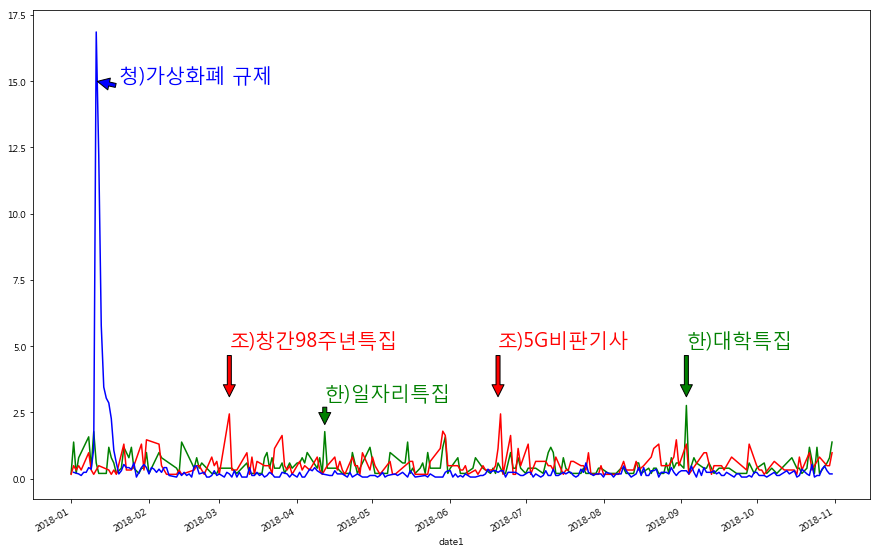

In [171]:
try:
    plt.figure(figsize =(15, 10))
    l3.plot(color = "g")
    l2.plot(color = "r")
    l1.plot(color = "b")
    date1 = datetime.datetime(2018,9,3)
    plt.annotate('한)대학특집', xy=("2018-09-03", 3), xytext=("2018-09-03",5),
                arrowprops=dict(facecolor='g', shrink=0.05),fontsize = 20, color = "g"
                )
    plt.annotate('한)일자리특집', xy=("2018-4-12", 2), xytext=("2018-4-12",3),
                arrowprops=dict(facecolor='g', shrink=0.05),fontsize = 20, color = "g"
                )
    plt.annotate('조)5G비판기사', xy=("2018-06-20", 3), xytext=("2018-6-20",5),
            arrowprops=dict(facecolor='r', shrink=0.05),fontsize = 20, color = "r"
            )
    plt.annotate('조)창간98주년특집', xy=("2018-03-05", 3), xytext=("2018-03-05",5),
            arrowprops=dict(facecolor='r', shrink=0.05),fontsize = 20, color = "r"
            )
    plt.annotate('청)가상화폐 규제', xy=("2018-01-11", 15), xytext=("2018-1-20",15),
            arrowprops=dict(facecolor='b', shrink=0.05),fontsize = 20, color = "b"
            )
except:
    pass

In [115]:
?plt.annotate

In [136]:
df2.sort_values("date1", inplace=True)

In [154]:
l2[l2.index > datetime.datetime(2018,3,1)]

date1
2018-03-05    2.442997
2018-03-06    0.325733
2018-03-08    0.325733
2018-03-09    0.488599
2018-03-12    0.977199
2018-03-13    0.162866
2018-03-14    0.814332
2018-03-15    0.162866
2018-03-16    0.651466
2018-03-19    0.488599
2018-03-21    0.488599
2018-03-22    0.162866
2018-03-23    1.140065
2018-03-26    1.628664
2018-03-27    0.488599
2018-03-28    0.325733
2018-03-29    0.488599
2018-03-30    0.162866
2018-04-02    0.651466
2018-04-03    0.325733
2018-04-04    0.488599
2018-04-06    0.325733
2018-04-09    0.814332
2018-04-10    0.325733
2018-04-11    0.162866
2018-04-12    0.325733
2018-04-13    0.488599
2018-04-16    0.814332
2018-04-17    0.325733
2018-04-18    0.651466
                ...   
2018-09-10    0.977199
2018-09-11    0.977199
2018-09-13    0.162866
2018-09-14    0.488599
2018-09-17    0.488599
2018-09-18    0.325733
2018-09-19    0.488599
2018-09-20    0.651466
2018-09-21    0.814332
2018-09-27    0.325733
2018-09-28    1.302932
2018-10-01    0.488599
2018-

In [167]:
df3[df3.date1 > datetime.datetime(2018,4,5)]

,Unnamed: 0,Title,Date,date1
0,0,11월 1일 인사,2018.10.31,2018-10-31
1,1,"[MODU 요즘 뜨는 학과] 빛으로 미래를 열다, 한양대 나노광전자학과",2018.10.31,2018-10-31
2,2,"[MODU 대학소식통] 한림대, 글로벌융합대학 ‘도헌글로벌스쿨’ 개관",2018.10.31,2018-10-31
3,3,"[MODU 주목! 생생 인터뷰] 과학으로 밝히는 정의, 법과학자",2018.10.31,2018-10-31
4,4,대한상의·중견기업연합회·중소기업중앙회 ‘동반성장 공동선언문’ 채택,2018.10.31,2018-10-31
5,5,"KT, ‘10기가 인터넷’ 상용화…영화 한편 내려받는데 30초",2018.10.31,2018-10-31
6,6,도시의 미래를 알아야 부동산 미래가 보인다,2018.10.31,2018-10-31
7,7,10월 31일 알림,2018.10.30,2018-10-30
8,8,"“계층 이동 막힌 한국, 사회적 엘리베이터 고장나 있다”",2018.10.30,2018-10-30
9,9,문 대통령 축전 “낡은 패러다임과 결별…포용적 성장의 길로”,2018.10.30,2018-10-30


In [179]:
df1[df1.제목.str.contains("공항")]

,Unnamed: 0,날짜,제목,주소,청원인,본문,date1
91,91,2018-10-01,김포공항 국제선 계류장 항공기소음 및 항공기 매연부터 개선시켜 주십시요 여름에는 살...,https://www1.president.go.kr/petitions/394597,1,공항공사에서 민원에 조금만 귀 기울이고 조금만 투자하면 근처에 살고있는 주민들에게 ...,2018-10-01
97,97,2018-09-28,김포공항 국제선 계류장 항공기소음 및 항공기 매연부터 개선시켜 주십시요 여름에는 살...,https://www1.president.go.kr/petitions/392112,1,공항공사에서는 민원에 조금만 귀 기울이고 조금만 투자하면 근처에 살고있는 주민들에...,2018-09-28
99,99,2018-09-27,김포공항 국제선 계류장 항공기소음 및 항공기 매연부터 개선시켜 주십시요 여름에는 살...,https://www1.president.go.kr/petitions/390901,3,공항공사에서 민원에 조금만 귀 기울이고 조금만 투자하면 근처에 살고있는 주민들에게 ...,2018-09-27
110,110,2018-09-21,김포공항 국제선 계류장 항공기소음 및 항공기 매연부터 개선시켜 주십시요 여름에는 살...,https://www1.president.go.kr/petitions/386946,4,"내일부터 국제선 계류장에서 텨저나오는 (토,일 추석연휴 내내 5일동안 우리는 지옥같...",2018-09-21
112,112,2018-09-20,김포공항 국제선 계류장 항공기소음 및 항공기 매연부터 개선시켜 주십시요 여름에는 살...,https://www1.president.go.kr/petitions/386217,3,새벽부터 밤11시넘어서까지 이게 사람이 어떻게 살아갑니까 (계류장항공기엔진소음+...,2018-09-20
115,115,2018-09-19,(인간의 기본적인 생활권임) 김포공항 국제선 계류장 항공기소음 및 항공기 매연부터 ...,https://www1.president.go.kr/petitions/385010,2,새벽부터 밤11시넘어서까지 이게 사람이 어떻게 살아갑니까 (계류장항공기엔진소음+...,2018-09-19
119,119,2018-09-18,김포공항 국제선 계류장 항공기소음 및 항공기 매연부터 개선시켜 주십시요 여름에는 살...,https://www1.president.go.kr/petitions/384132,3,가능한 빨리 개선시켜 주시기 바랍니다.이건 인간이 거주하는 공간 삶이 터전이 아닙니...,2018-09-18
120,120,2018-09-17,김포공항 국제선 계류장 항공기소음 및 항공기 매연부터 개선시켜 주십시요 여름에는 살...,https://www1.president.go.kr/petitions/383539,2,이건 하루이틀도 아니고 인간이 사는 조건이 절대 아닙니다 국제선을 인천공항으로 이전...,2018-09-17
148,148,2018-09-10,김포공항 국제선 계류장 항공기소음 및 항공기 매연부터 개선시켜 주십시요 여름에는 살...,https://www1.president.go.kr/petitions/374331,1,주말이 정말 두렵다 토요일 일요일새벽부터 밤늦게까지 국제선 계류장에서 터져나오는 ...,2018-09-10
161,161,2018-09-07,김포공항 국제선 계류장 항공기소음 및 항공기 매연부터 개선시켜 주십시요 여름에는 살...,https://www1.president.go.kr/petitions/370734,1,주말이 정말 두렵다 토요일 일요일새벽부터 밤늦게까지 국제선 계류장에서 터져나오는 ...,2018-09-07


In [105]:
datetime.datetime(2018.09.01)

SyntaxError: invalid syntax (<ipython-input-105-de3a706e7b09>, line 1)

# 전체 키워드 비교를 위한 데이터프레임 병합

In [14]:
dfhan = pd.read_csv("./new/df_industrycommon.csv", encoding = "euc-kr")
dfcho = pd.read_csv("./new/cho_it.csv", encoding = "euc-kr")
dfchung = pd.read_csv("4th_nouns_stop.csv", encoding="utf-8")

In [15]:
dfcho10 = dfcho[:10]
dfhan10 = dfhan[:10]
dfchung10 = dfchung[:10]

In [16]:
dfcho.drop([1], axis = 0, inplace=True)

In [18]:
dfhan.drop([4], axis = 0, inplace=True)

In [17]:
dfhan10["한겨례순위"] = list(range(1, 11))
dfcho10["조선일보순위"] = list(range(1, 11))
dfchung10["청와대순위"] = list(range(1, 11))

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata

In [18]:
dfcho10.columns = ["순", "단어", "조선일보빈도", "조선일보순위"]
dfhan10.columns = ["단어", "한겨례빈도", "한겨례순위"]
dfchung10.columns = ["순", "단어", "청원빈도", "청원순위"]

In [39]:
dfchung10

,순,단어,청원빈도,청원순위
0,0,가상화폐,103,1
1,1,정부,62,2
2,2,규제,54,3
3,3,청원,41,4
4,4,반대,40,5
5,5,대한민국,38,6
6,6,일자리,32,7
7,7,암호화폐,31,8
8,8,정책,30,9
9,9,개선,29,10


In [20]:
dfall = dfchung10.merge(dfcho10, on= "단어", how = "outer")

In [21]:
dfall = dfall.merge(dfhan10, on = "단어", how = "outer")

In [28]:
dfall

,단어,청원빈도,청원순위,조선일보빈도,조선일보순위,한겨례빈도,한겨례순위
0,가상화폐,103.0,1.0,NaN,NaN,NaN,NaN
1,정부,62.0,2.0,NaN,NaN,14.0,3.0
2,규제,54.0,3.0,NaN,NaN,NaN,NaN
3,청원,41.0,4.0,NaN,NaN,NaN,NaN
4,반대,40.0,5.0,NaN,NaN,NaN,NaN
5,대한민국,38.0,6.0,NaN,NaN,NaN,NaN
6,일자리,32.0,7.0,17.0,5.0,11.0,4.0
7,암호화폐,31.0,8.0,NaN,NaN,NaN,NaN
8,정책,30.0,9.0,NaN,NaN,NaN,NaN
9,개선,29.0,10.0,NaN,NaN,NaN,NaN


In [26]:
dfall.drop(["순_x", "순_y"], axis = 1, inplace=True)
dfall.set_index("단어", inplace=True)

KeyError: "labels ['순_x' '순_y'] not contained in axis"

In [76]:
dfrank = dfall.drop(["청원빈도", "조선일보빈도", "한겨례빈도"], axis = 1)

In [29]:
dfnum = dfall.drop(["청원순위", "조선일보순위", "한겨례순위"], axis = 1)


In [83]:
dfnum.set_index("단어", inplace= True)
dfrank.set_index("단어", inplace= True)

In [30]:
dfnum

,단어,청원빈도,조선일보빈도,한겨례빈도
0,가상화폐,103.0,NaN,NaN
1,정부,62.0,NaN,14.0
2,규제,54.0,NaN,NaN
3,청원,41.0,NaN,NaN
4,반대,40.0,NaN,NaN
5,대한민국,38.0,NaN,NaN
6,일자리,32.0,17.0,11.0
7,암호화폐,31.0,NaN,NaN
8,정책,30.0,NaN,NaN
9,개선,29.0,NaN,NaN


## 키워드 순위 비교(그래프 높이가 높을수록 낮은순위)

<Figure size 1080x720 with 0 Axes>

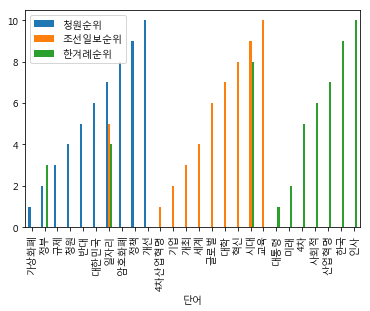

In [86]:
plt.figure(figsize =(15, 10))
dfrank.plot.bar()
plt.show()

## 키워드 빈도 비교(그래프 높이가 높을수록 높은 순위)

<Figure size 1080x720 with 0 Axes>

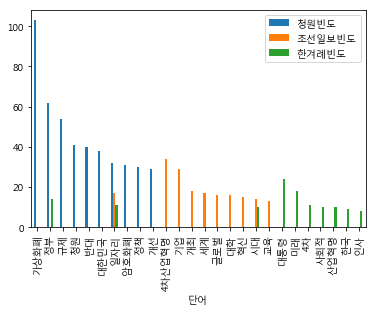

In [87]:
plt.figure(figsize =(15, 10))
dfnum.plot.bar()
plt.show()

## 플랫폼별 탑10 키워드

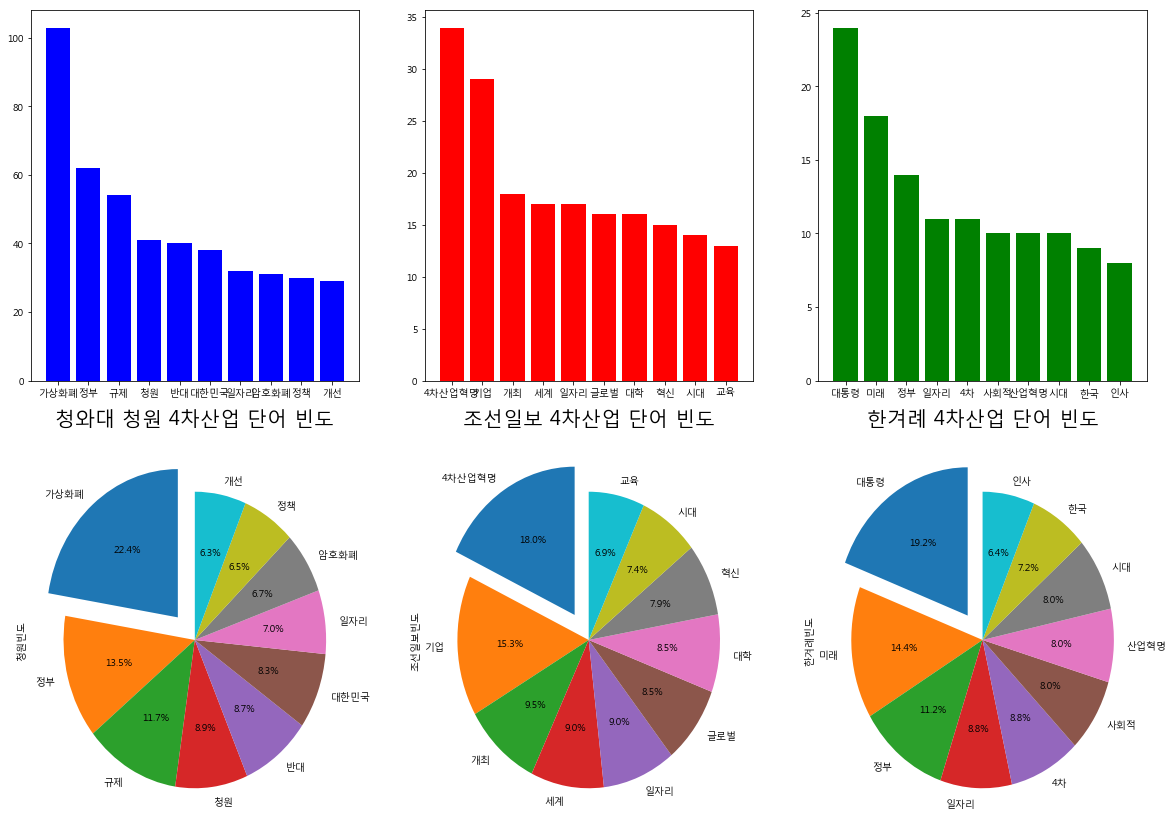

In [162]:
plt.figure(figsize=(20, 15))

plt.subplot(231)
plt.bar(dfchung10["단어"],dfchung10["청원빈도"],color = "b" )
# plt.xticks = dfchung10["단어"]

plt.subplot(232)
plt.bar(dfcho10["단어"], dfcho10["조선일보빈도"],color = "r" )

plt.subplot(233)
plt.bar(dfhan10["단어"], dfhan10["한겨례빈도"],color = "g" )


plt.subplot(234)
label = dfchung10["단어"]
dfchung10["청원빈도"].plot.pie(explode = [0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0], labels = label, autopct = "%1.1f%%", startangle=90)
plt.title("\n청와대 청원 4차산업 단어 빈도\n", fontsize = 20)

plt.subplot(235)
label = dfcho10["단어"]
dfcho10["조선일보빈도"].plot.pie(explode = [0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0],labels = label, autopct = "%1.1f%%", startangle=90)
plt.title("\n조선일보 4차산업 단어 빈도\n", fontsize= 20)

plt.subplot(236)
label = dfhan10["단어"]
dfhan10["한겨례빈도"].plot.pie(explode = [0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0],labels = label, autopct = "%1.1f%%", startangle=90)
plt.title("\n한겨례 4차산업 단어 빈도\n", fontsize = 20)
plt.show()
